In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_linear_constraint(name, A, lb, ub, linestyle="-"):
    """
    Plot in form y = A*v, where A is 2x2, lb, ub are size 2

    Lower bound: first is light red, second is dark red
    Upper bound: first is light green, second is dark green

    Note: Not adding in bias `b` for simplicity.
    """
    lb_1, lb_2 = lb
    ub_1, ub_2 = ub

    # Corners in y = A*v
    Ainv = np.linalg.pinv(A)
    A = Ainv @ np.array([lb_1, lb_2])
    B = Ainv @ np.array([lb_1, ub_2])
    C = Ainv @ np.array([ub_1, ub_2])
    D = Ainv @ np.array([ub_1, lb_2])

    def plot_line(start, end, color):
        ws = np.vstack([start, end])
        wxs, wys = ws.T
        plt.plot(wxs, wys, color, linestyle=linestyle)

    plot_line(A, D, "salmon")
    plot_line(A, B, "firebrick")
    plot_line(B, C, "limegreen")
    plot_line(C, D, "darkgreen")

    plt.xlabel(f"${name}_1$")
    plt.ylabel(f"${name}_2$")

Show vanilla bounding box constraint for $x \in R^2$, $x_i \in [-1, 1]$

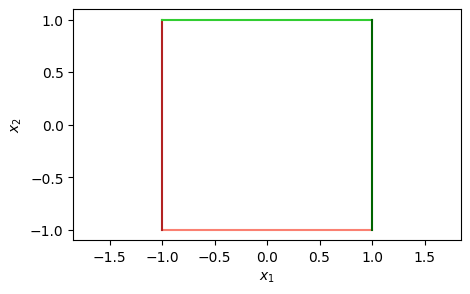

In [3]:
plt.figure(figsize=(5, 3))
plot_linear_constraint("x", np.eye(2), -np.ones(2), np.ones(2))
plt.axis("equal")
pass

In [4]:
def rot(th):
    c = np.cos(th)
    s = np.sin(th)
    return np.array([
        [c, -s],
        [s, c],
    ])

First show linear constraint on $\dot{q}$.

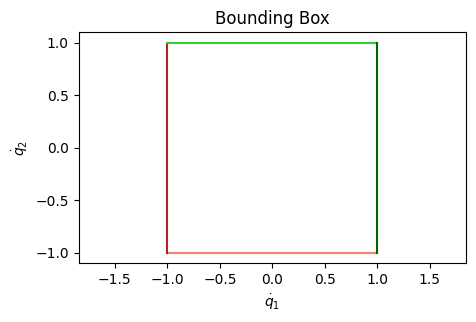

In [5]:
lower_qdot = -np.ones(2)
upper_qdot = np.ones(2)

plt.figure(figsize=(5, 3))
plot_linear_constraint(r"\dot{q}", np.eye(2), lower_qdot, upper_qdot)
plt.title("Bounding Box")
plt.axis("equal")
pass

Given $\dot{q} = N v$, $v = N^\dag \dot{q}$, let's make a "fake" Jacobian of $N = \text{rot}(\theta)$

Then reproject to bounding box constraint on $v$; however, note that:

- We don't cover the exact same regions
- We can encounter sign flips

No rotation


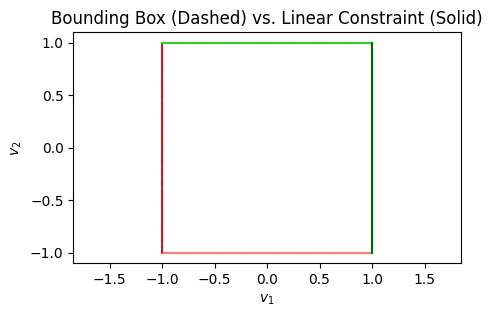

15 degrees rotation


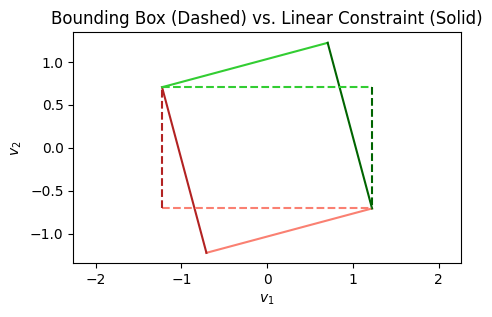

40 degrees rotation


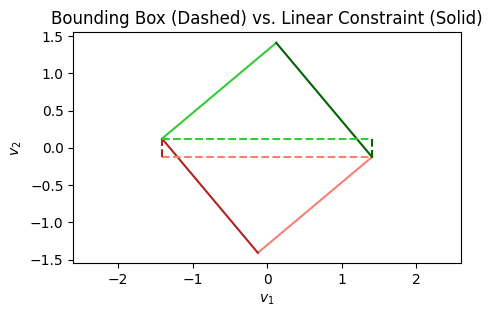

105 degrees rotation


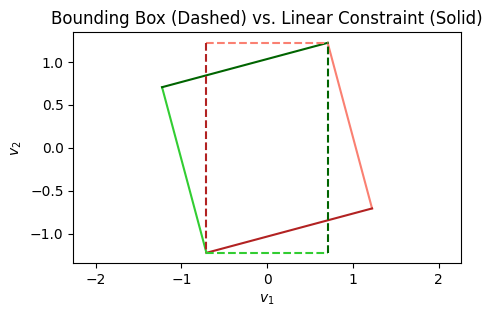

In [6]:
def show_example(N):
    Nplus = np.linalg.pinv(N)
    lower_v = Nplus @ lower_qdot
    upper_v = Nplus @ upper_qdot

    plt.figure(figsize=(5, 3))
    plot_linear_constraint("v", Nplus, lower_qdot, upper_qdot)
    plot_linear_constraint("v", np.eye(2), lower_v, upper_v, "--")
    plt.title("Bounding Box (Dashed) vs. Linear Constraint (Solid)")
    plt.axis("equal")
    plt.show()

print("No rotation")
show_example(N=rot(np.deg2rad(0.0)))

print("15 degrees rotation")
show_example(N=rot(np.deg2rad(15.0)))

print("40 degrees rotation")
show_example(N=rot(np.deg2rad(40.0)))

print("105 degrees rotation")
show_example(N=rot(np.deg2rad(105.0)))